# Anomaly detection

Będziemy używać zbioru EKG z [PhysioNet](http://physionet.org/physiobank/database/apnea-ecg/). Dokładniejszy opis można znaleźć tu: https://github.com/mrahtz/sanger-machine-learning-workshop

In [2]:
from __future__ import print_function
import ekg_data

ekg_filename = 'data_cl/a02.dat'
ekg_data_save = ekg_data.read_ekg_data(ekg_filename)
print(ekg_data_save.shape)

(3182000,)


Nasze dane to lista liczb

In [3]:
print("ekg_data[0]:\t", ekg_data_save[0])
print("ekg_data[1]:\t", ekg_data_save[1])
print("ekg_data.min:\t", ekg_data_save.min())
print("ekg_data.max:\t", ekg_data_save.max())

ekg_data[0]:	 -4.0
ekg_data[1]:	 -4.0
ekg_data.min:	 -572.0
ekg_data.max:	 580.0


Jest to sygnał więc można go narysować

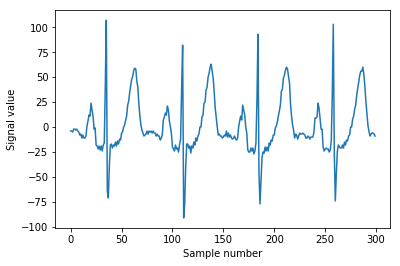

In [4]:
# IPython 'magic' command to set the matplotlib backend to display
# in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

n_samples_to_plot = 300
plt.plot(ekg_data_save[0:n_samples_to_plot])
plt.xlabel("Sample number")
plt.ylabel("Signal value")
plt.show()

Jako zbiór treningowy weźmy kilka pierwszych wartości

In [5]:
ekg_data = ekg_data_save[0:8192]

## Windowing

Żeby pracować z danymi z szeregu czasowego zwykle go okienkujemy. 

ZADANIE: Proszę przekształcić ekg_data do postaci wektorowej - idziemy co 2 i tworzymy wektory długości 32

In [6]:
import numpy as np

segment_len = 32
slide_len = 2

segments = []
for start_pos in range(0, len(ekg_data), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(ekg_data[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))

Produced 4081 waveform segments


In [7]:
segments[0]

array([ -4.,  -4.,  -5.,  -2.,  -2.,  -3.,  -2.,  -4.,  -5.,  -8.,  -7.,
       -11.,  -8., -11., -11.,  -9.,   1.,   6.,  12.,  11.,  24.,  17.,
        11.,  -2.,  -1., -18., -19., -22., -19., -23., -19., -24.])

ZADANIE: Proszę narysować przykładowe segmenty

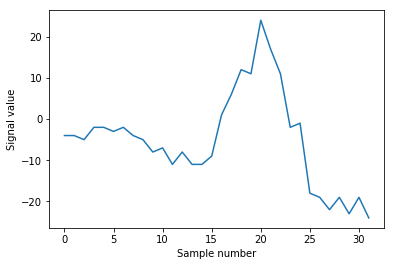

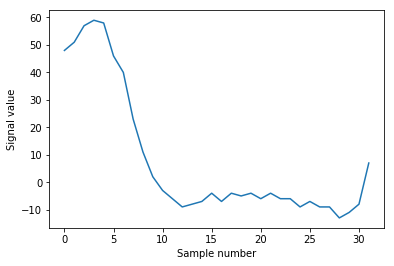

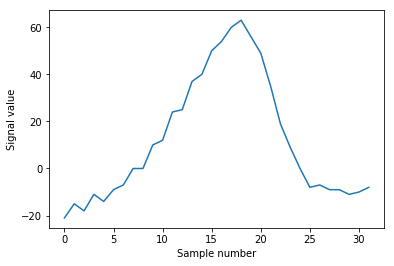

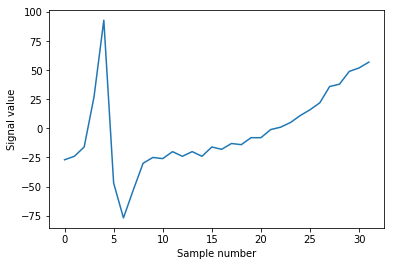

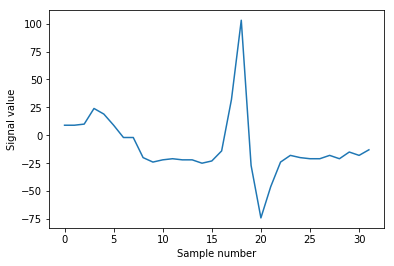

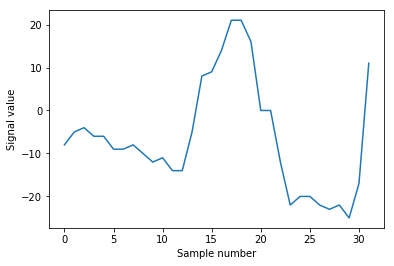

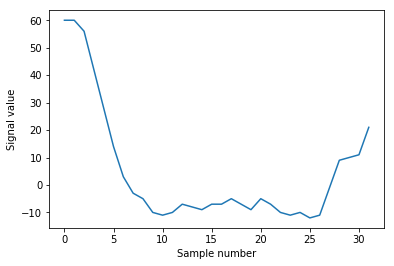

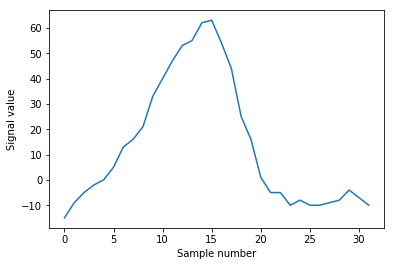

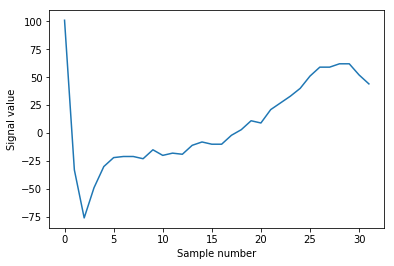

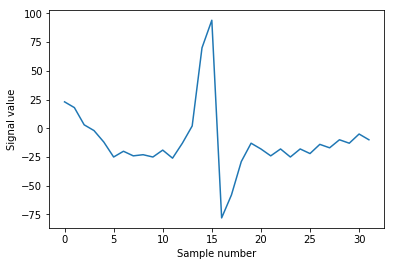

In [8]:
for i in range(0,300, 30):
    plt.plot(segments[i])
    plt.xlabel("Sample number")
    plt.ylabel("Signal value")
    plt.show()

In [9]:
windowed_segments = segments

## Clustering

ZADANIE: Poklastrować dane tak żeby znaleźć zbiór typowych fali

In [10]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=150)
clusterer.fit(windowed_segments)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=150, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

ZADANIE: Narysować reprezentatów klastrów

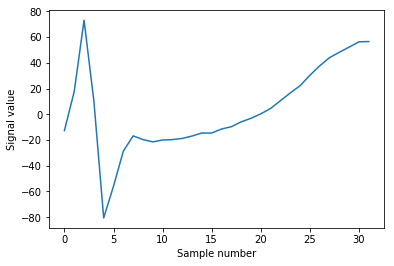

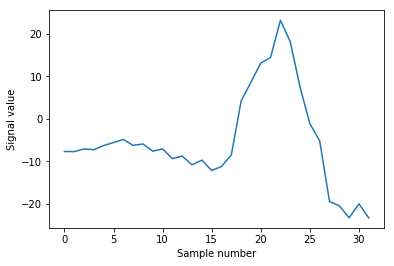

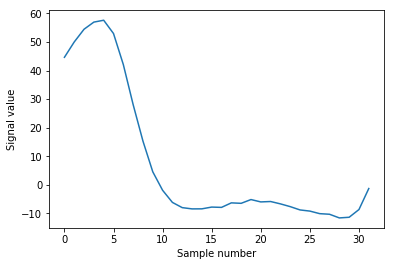

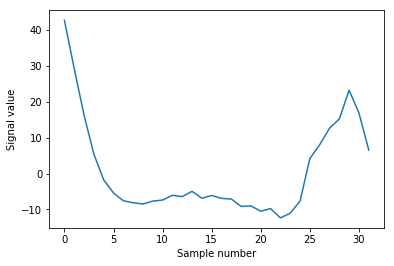

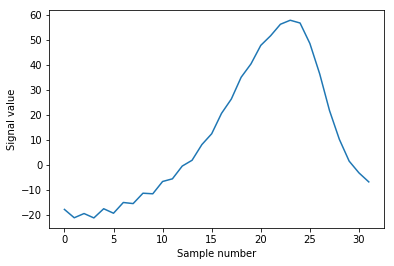

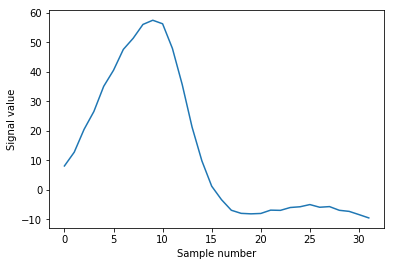

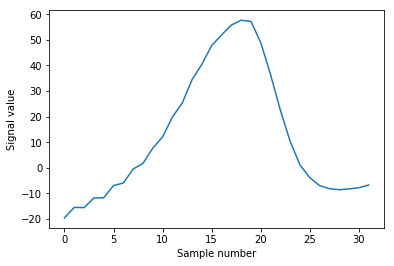

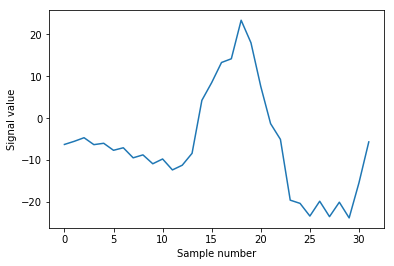

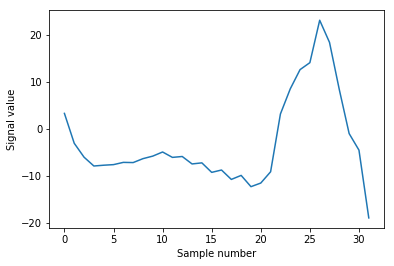

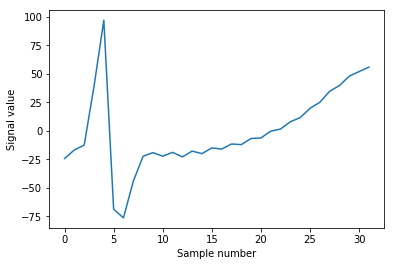

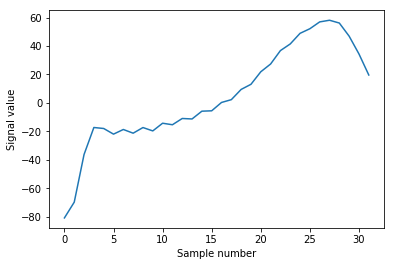

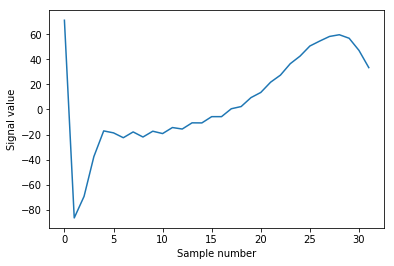

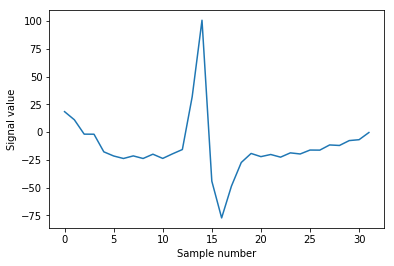

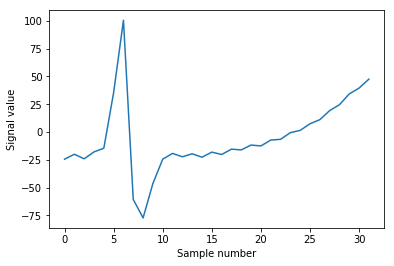

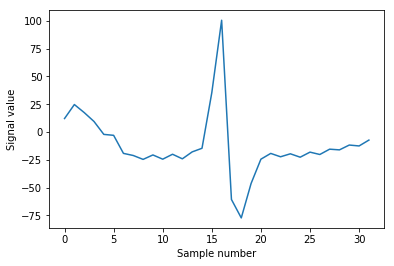

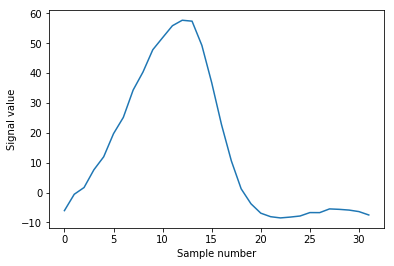

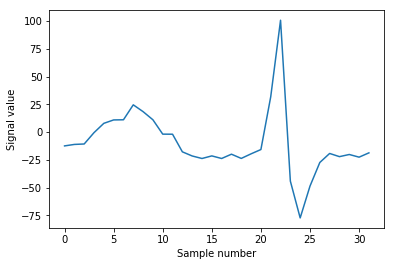

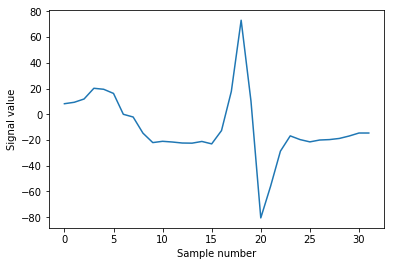

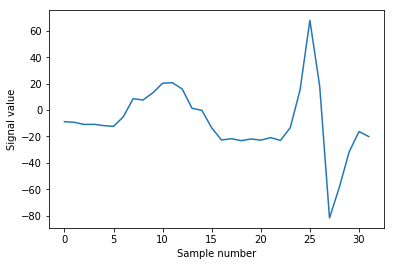

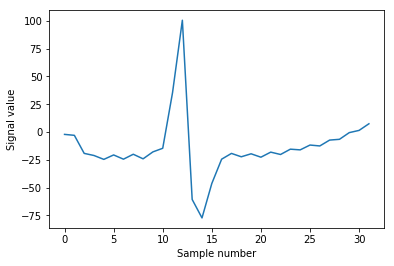

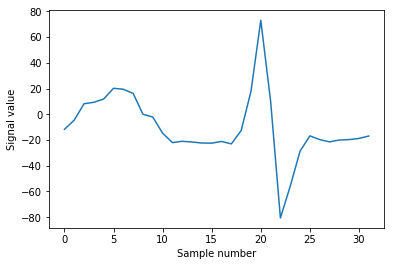

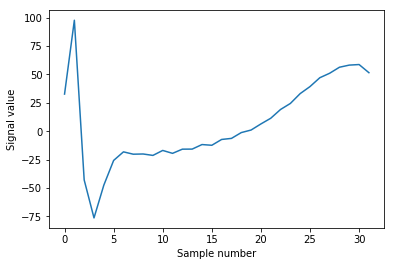

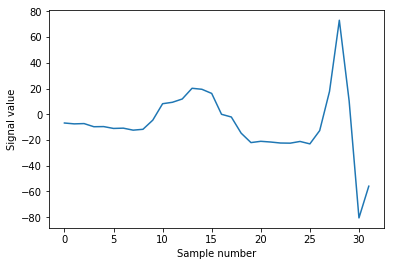

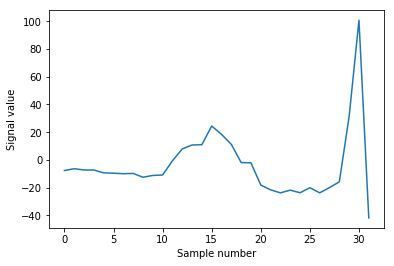

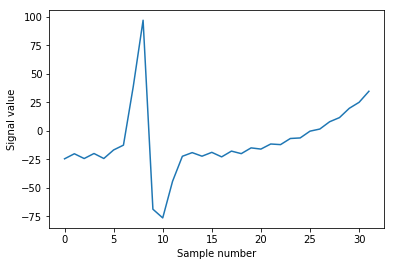

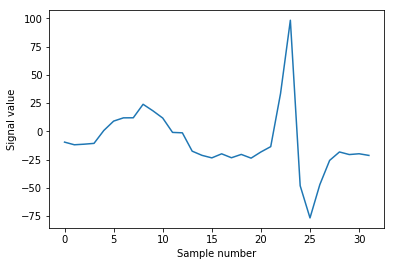

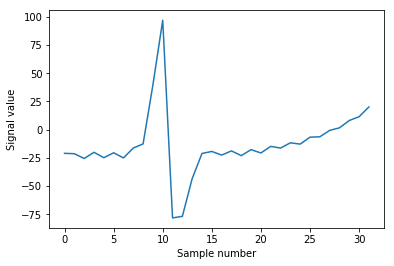

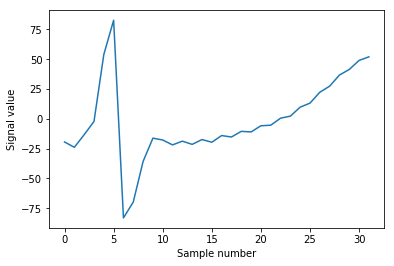

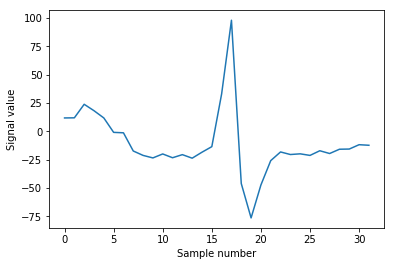

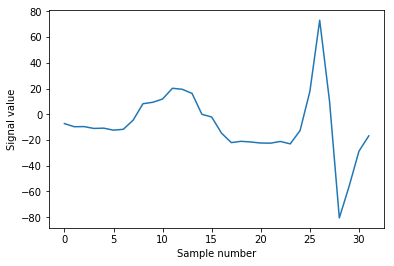

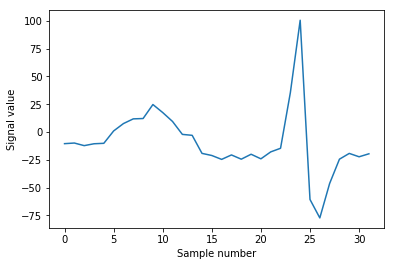

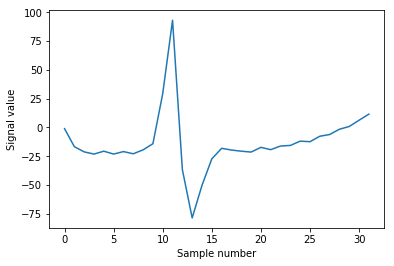

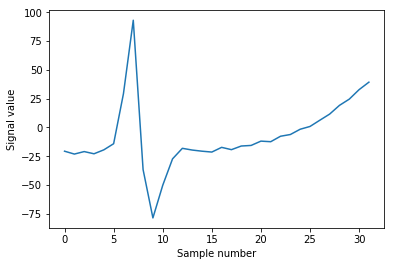

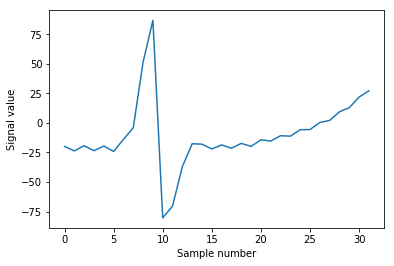

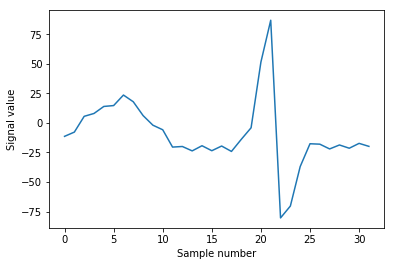

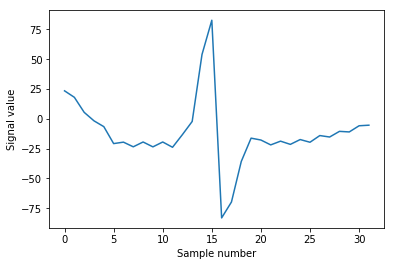

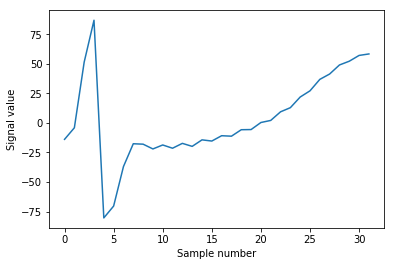

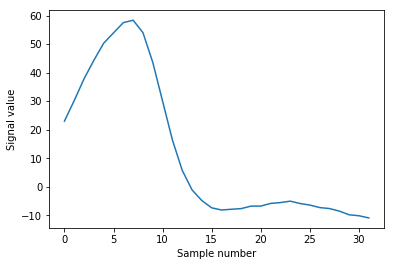

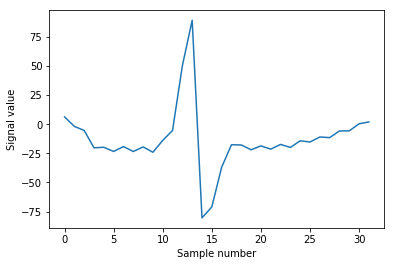

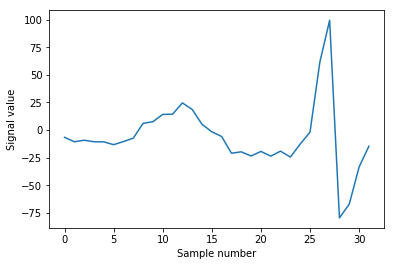

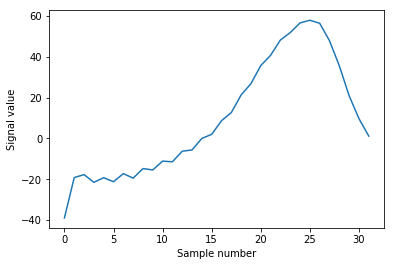

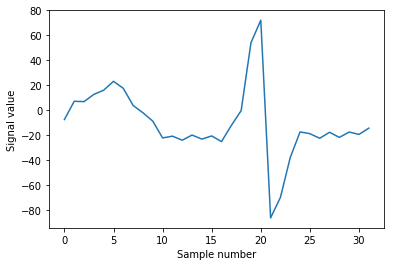

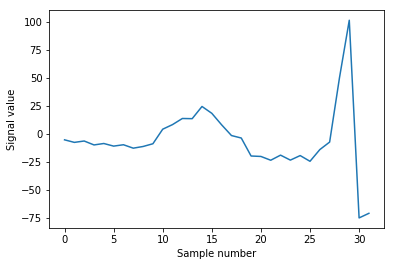

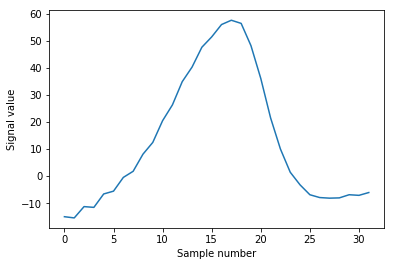

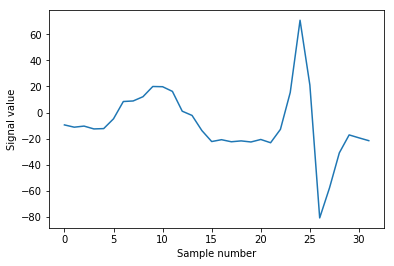

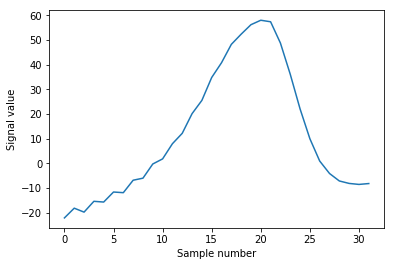

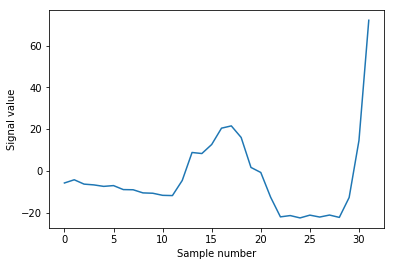

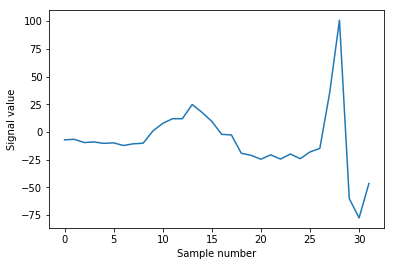

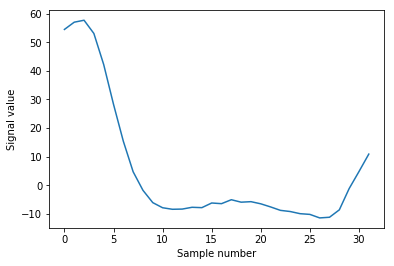

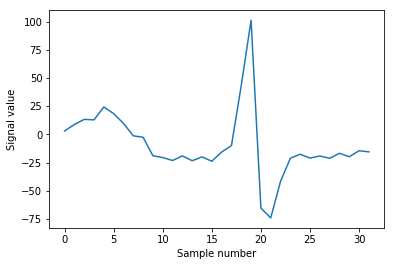

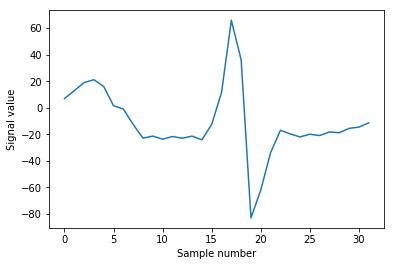

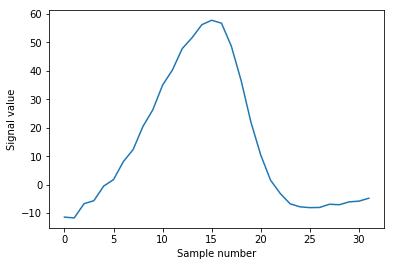

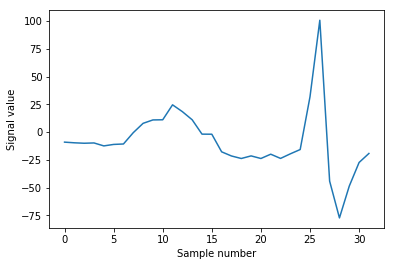

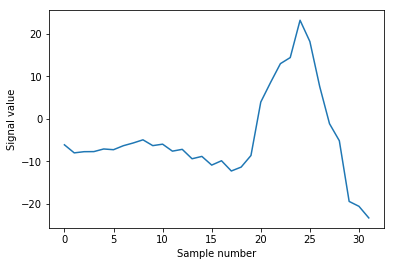

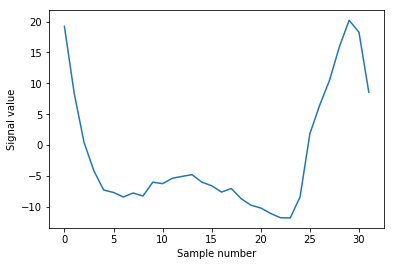

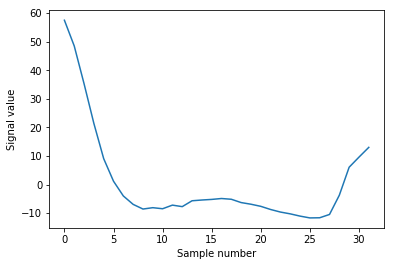

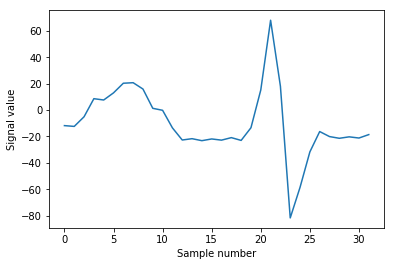

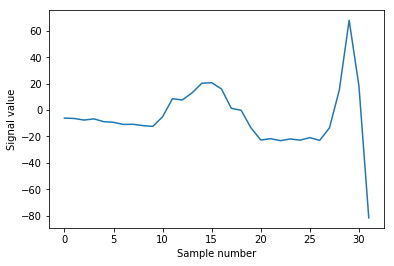

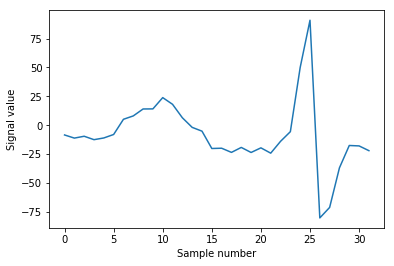

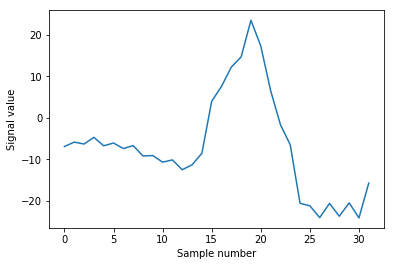

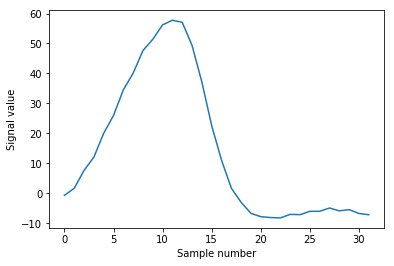

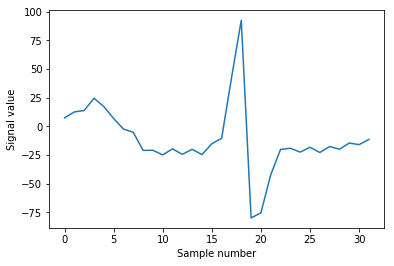

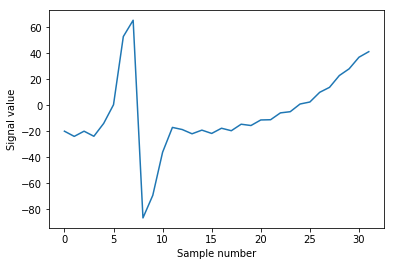

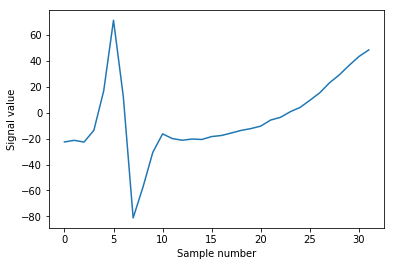

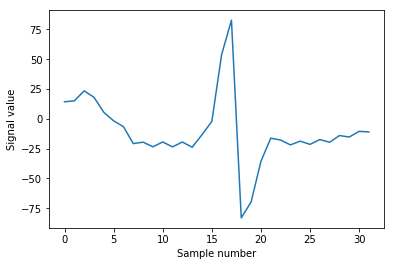

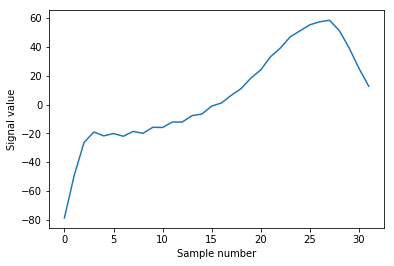

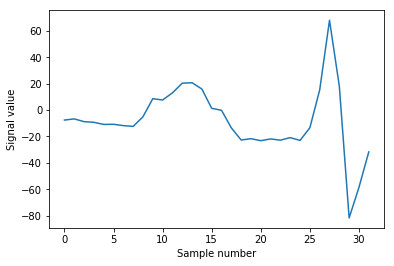

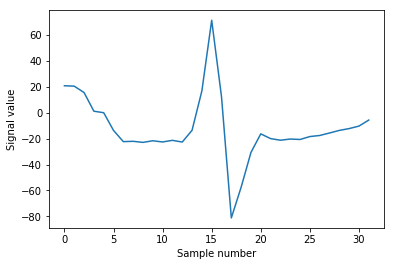

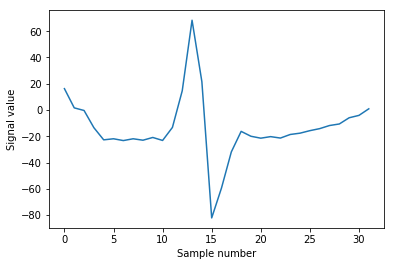

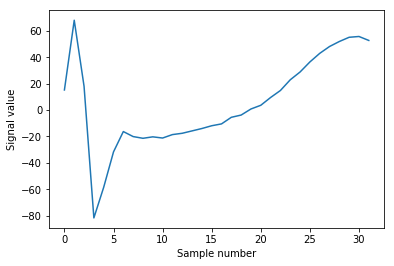

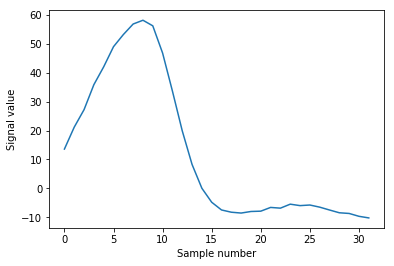

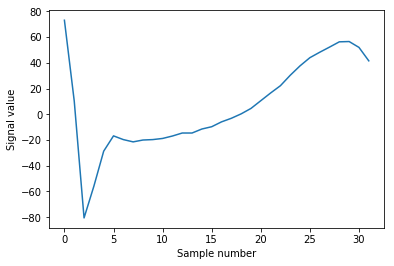

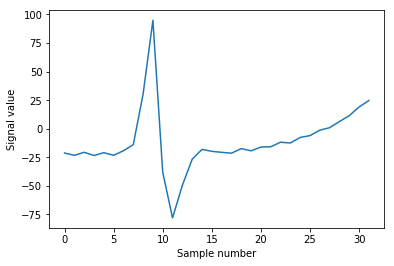

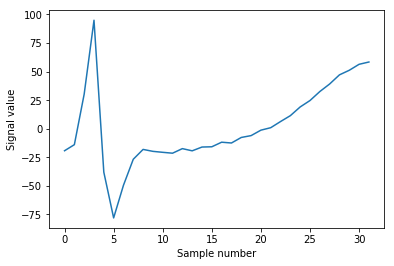

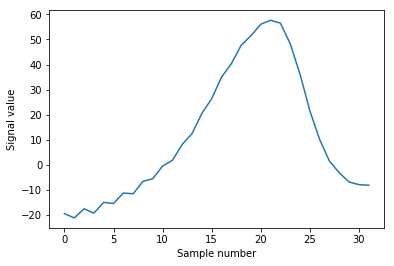

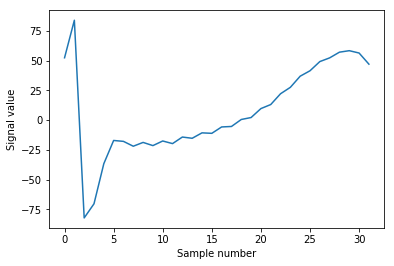

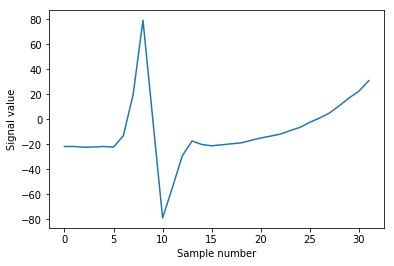

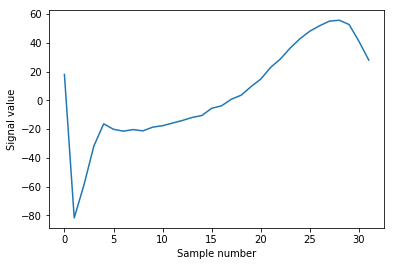

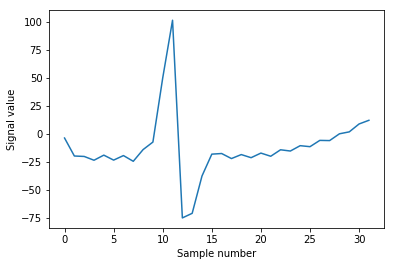

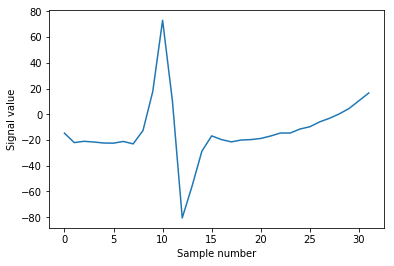

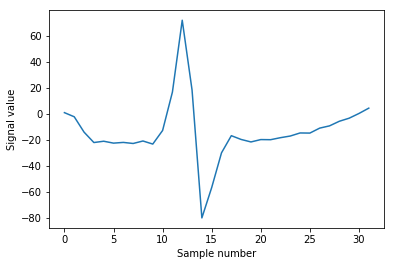

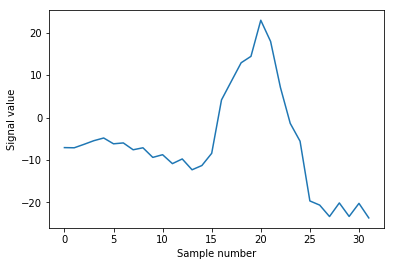

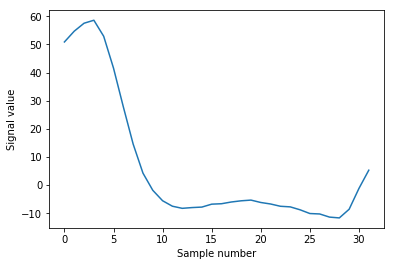

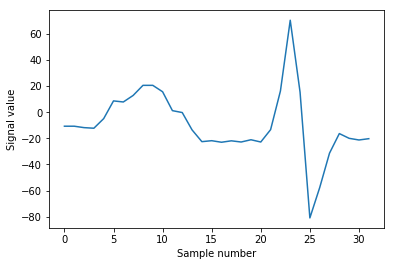

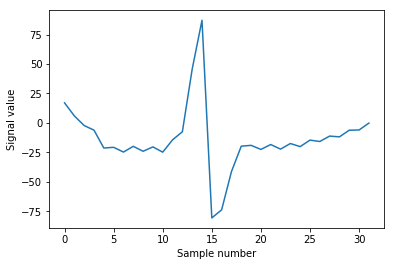

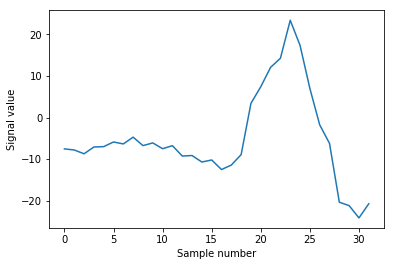

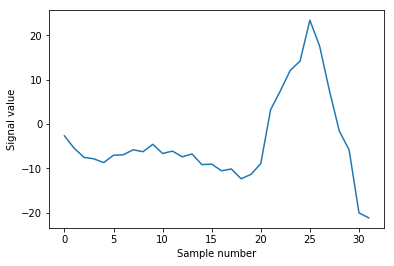

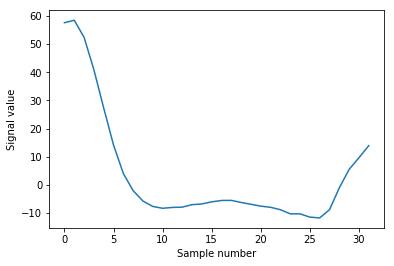

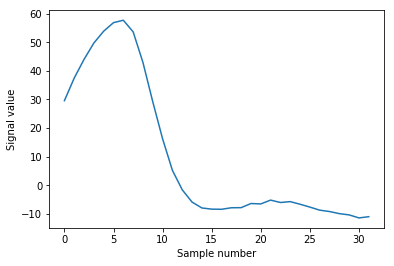

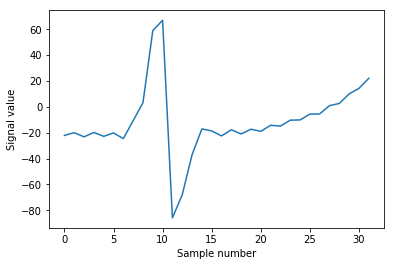

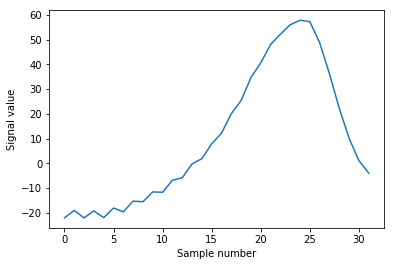

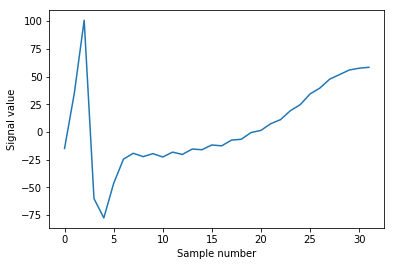

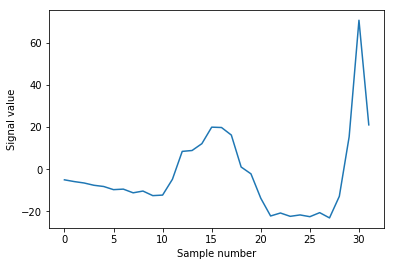

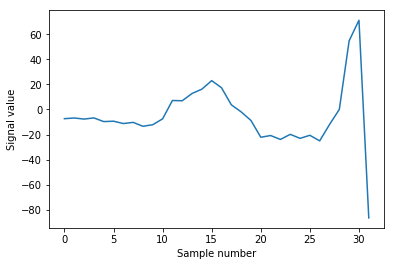

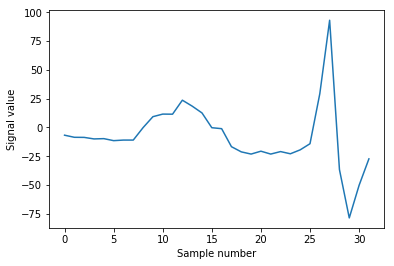

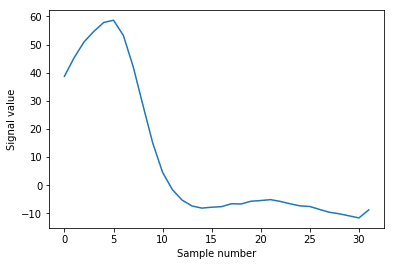

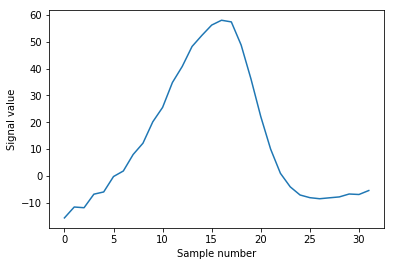

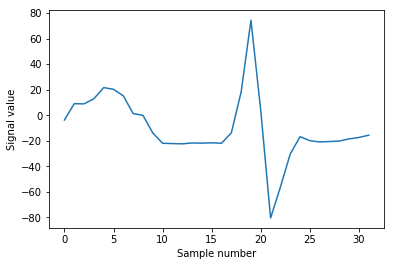

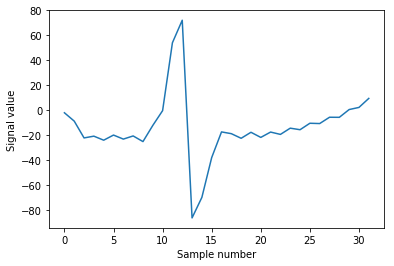

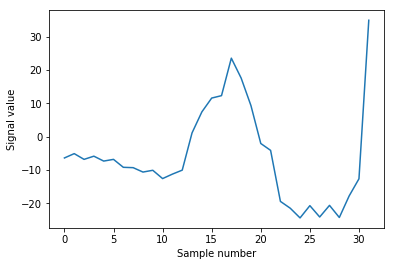

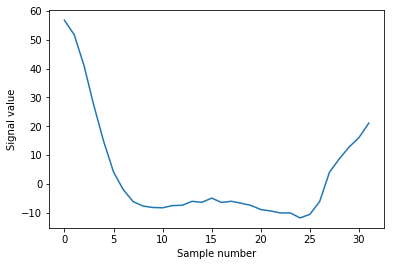

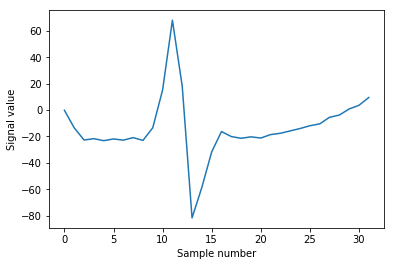

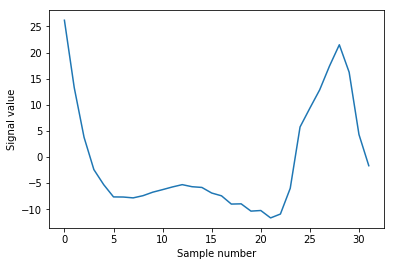

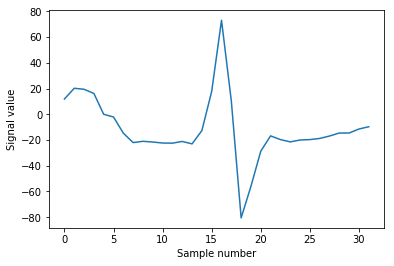

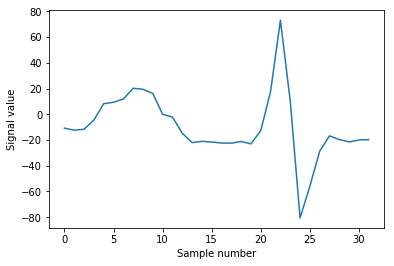

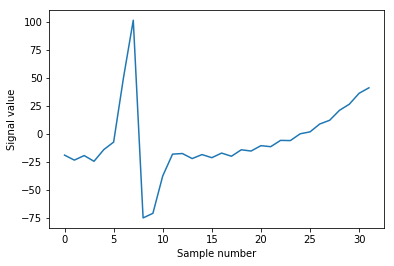

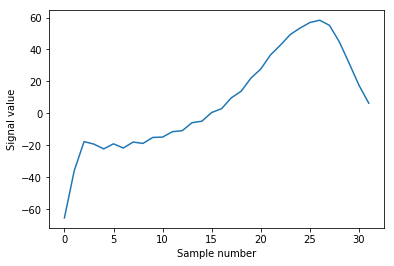

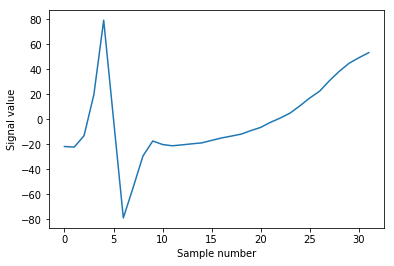

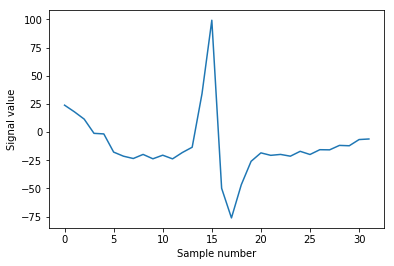

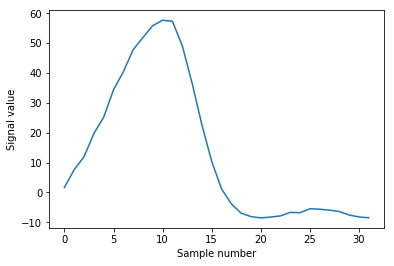

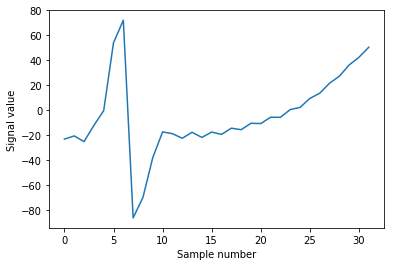

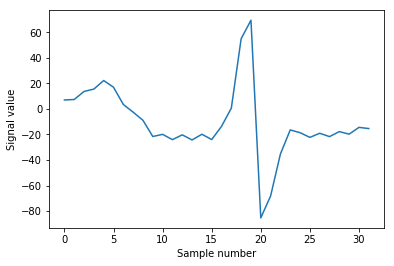

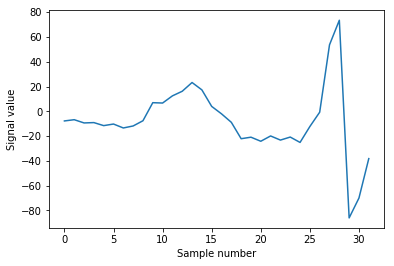

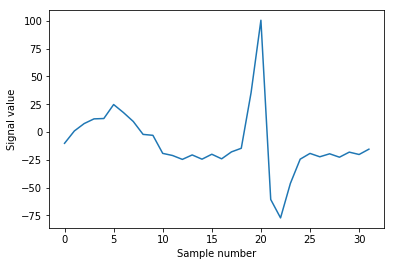

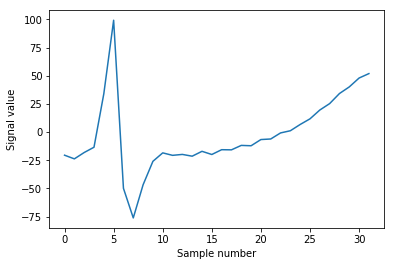

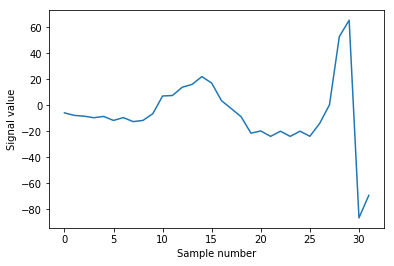

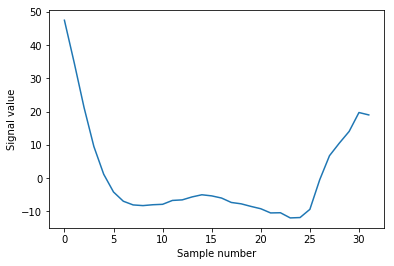

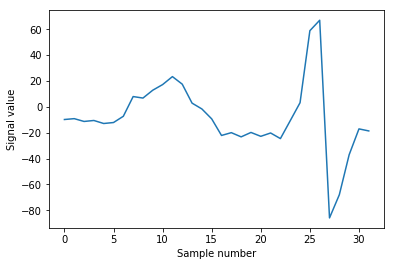

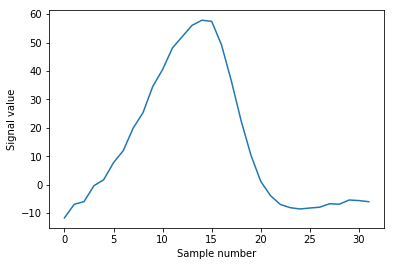

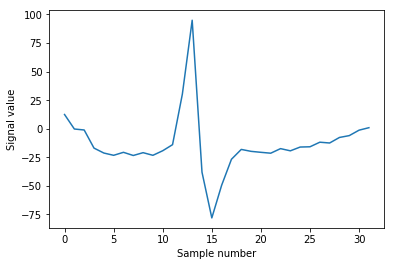

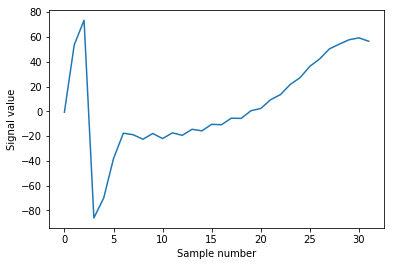

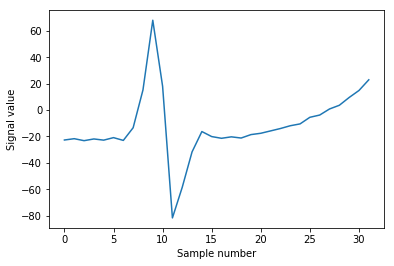

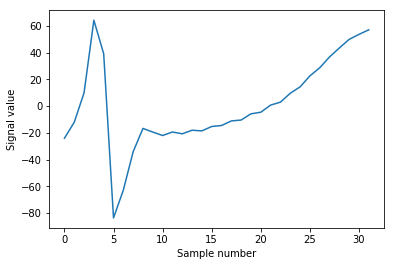

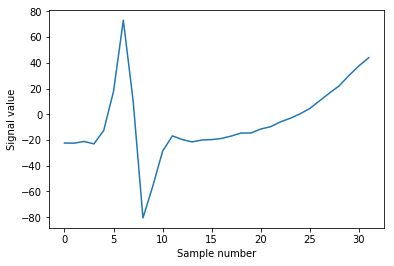

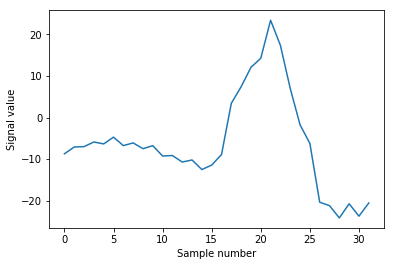

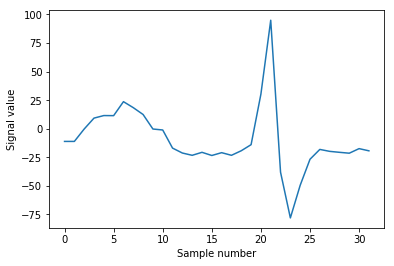

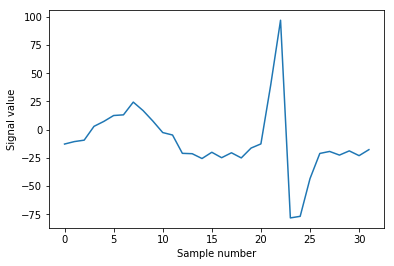

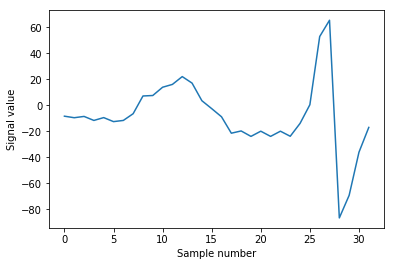

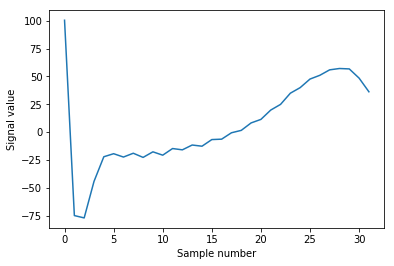

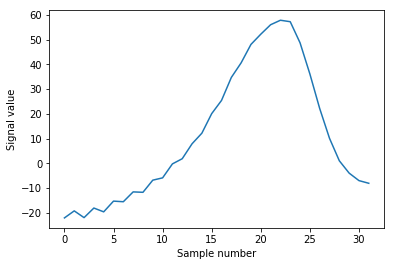

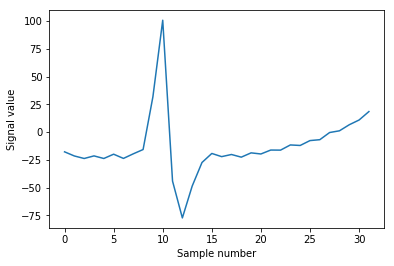

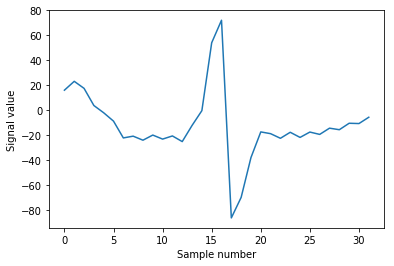

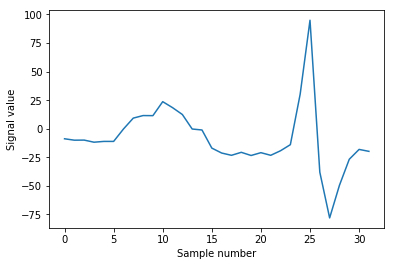

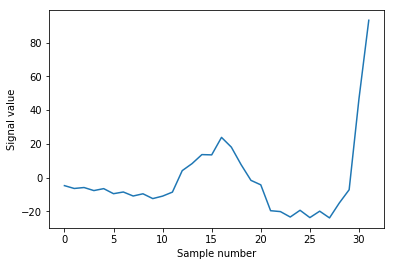

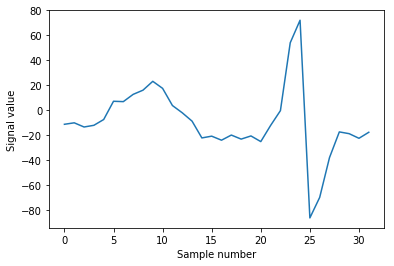

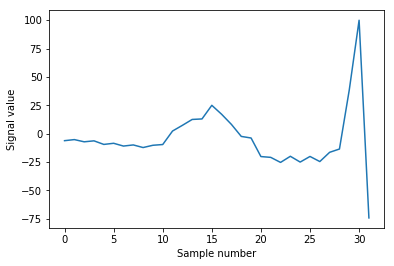

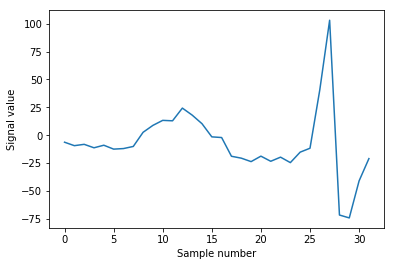

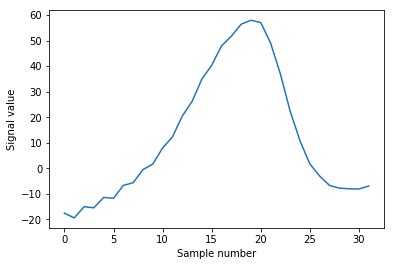

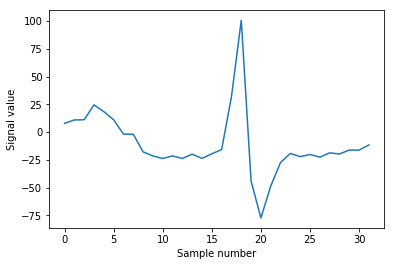

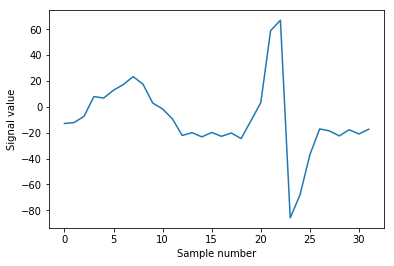

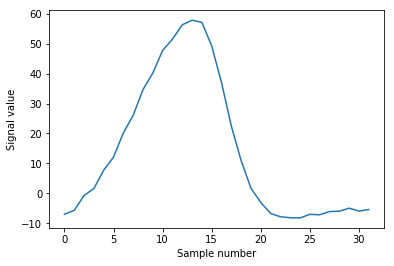

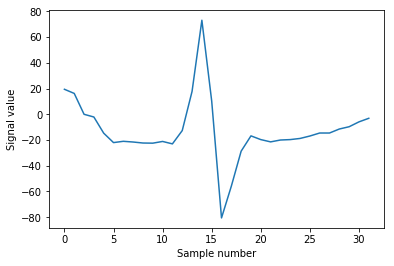

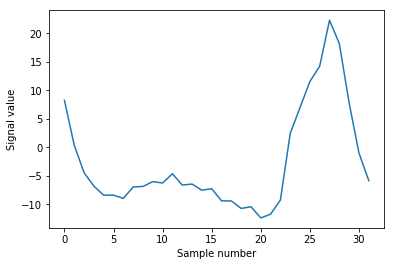

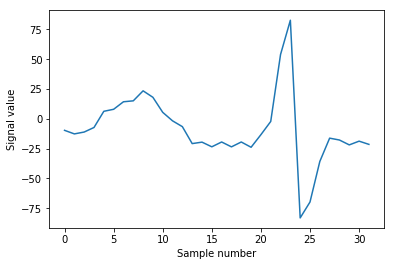

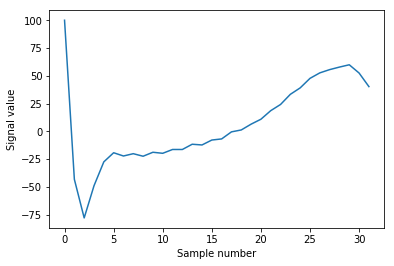

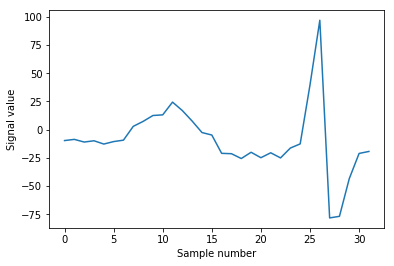

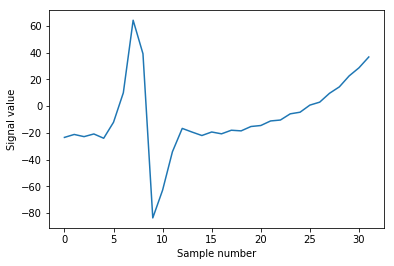

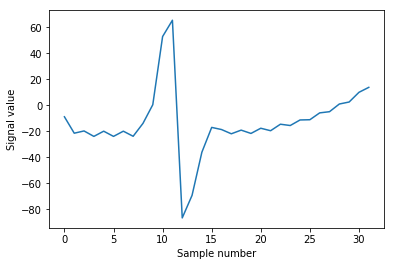

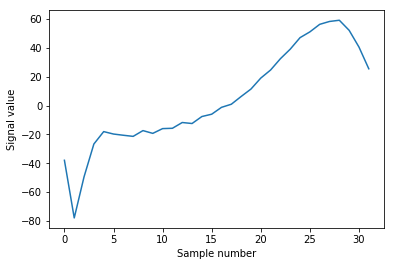

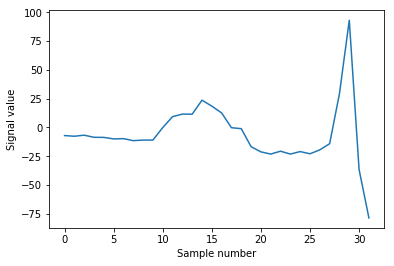

In [11]:
for w in clusterer.cluster_centers_:
    plt.plot(w)
    plt.xlabel("Sample number")
    plt.ylabel("Signal value")
    plt.show()

Fala będzie anomalią jeśli będzie daleko od naszego modelu:
* dla każdej fali szukamy najbliższego centra
* dopasowanie to odległość od najbliższego centra

ZADANIE: Dla zbioru testowego i treningowego policz dopasowanie. Narysuj oryginalną falę i falę dopasowania. Oceń które fale są anomaliami

In [12]:
ekg_data_test = ekg_data_save[:8192]

In [13]:
import numpy as np

segment_len = 32
slide_len = 2

test_segments = []
for start_pos in range(0, len(ekg_data_test), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    test_segment = np.copy(ekg_data_test[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(test_segment) != segment_len:
        continue
    test_segments.append(test_segment)

print("Produced %d waveform segments" % len(test_segments))

Produced 4081 waveform segments


Zobaczmy jak wykląda dopasowanie wybranej fali do centra

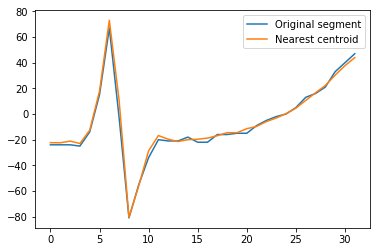

In [14]:
centroids = clusterer.cluster_centers_

nearest_centroid_idx = clusterer.predict(test_segments)

idx = 200
nearest_centroid = np.copy(centroids[nearest_centroid_idx[idx]])
plt.figure()
plt.plot(test_segments[idx], label="Original segment")
plt.plot(nearest_centroid, label="Nearest centroid")
plt.legend()
plt.show()

In [15]:
len(test_segments)

4081

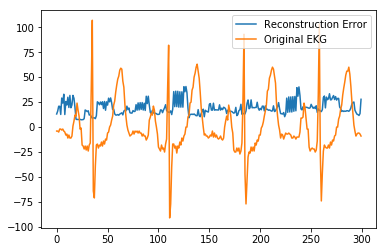

In [16]:
from scipy.spatial.distance import euclidean
n_plot_samples = 300
centroids = clusterer.cluster_centers_

nearest_centroids_idx = clusterer.predict(test_segments)


error = []
for i in range(len(test_segments)):
    nearest_centroid = np.copy(centroids[nearest_centroids_idx[i]])
    error.append(euclidean(nearest_centroid, test_segments[i]))

plt.plot(error[0:n_plot_samples], label="Reconstruction Error")
plt.plot(ekg_data_test[0:n_plot_samples], label="Original EKG")
plt.legend()
plt.show()

ZADANIE: Stwórz ręcznie anomalię, np. wyzeruj 5 współrzędnych w oryginalnym sygnale - powtórze poprzednie zadanie na takim sygnale

In [17]:
ekg_data_anomalous = np.copy(ekg_data_test)
ekg_data_anomalous[210:215] = 0

In [18]:
import numpy as np

segment_len = 32
slide_len = 2

test_segments = []
for start_pos in range(0, len(ekg_data_anomalous), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    test_segment = np.copy(ekg_data_anomalous[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(test_segment) != segment_len:
        continue
    test_segments.append(test_segment)

print("Produced %d waveform segments" % len(test_segments))

Produced 4081 waveform segments


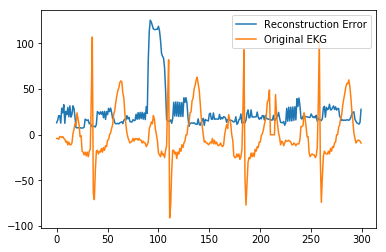

In [19]:
from scipy.spatial.distance import euclidean
n_plot_samples = 300
centroids = clusterer.cluster_centers_

nearest_centroids_idx = clusterer.predict(test_segments)


error = []
for i in range(len(test_segments)):
    nearest_centroid = np.copy(centroids[nearest_centroids_idx[i]])
    error.append(euclidean(nearest_centroid, test_segments[i]))

plt.plot(error[0:n_plot_samples], label="Reconstruction Error")
plt.plot(ekg_data_anomalous[0:n_plot_samples], label="Original EKG")
plt.legend()
plt.show()